# Regression

A regression is a predictive model that looks for a functional relationship between a set of variables (X) and a continuous outcome variable (y).

In other word, given an input array we try to predict a numerical value.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Weight - Height dataset

In [ ]:
df = pd.read_csv('../data/weight-height.csv')

In [ ]:
df.head()

### Visualize the dataset

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(df['Height'], df['Weight'], alpha = 0.2)
plt.title('Humans', size=20)
plt.xlabel('Height (in)', size=20)
plt.ylabel('Weight (lbs)', size=20)

## Visualize male and female populations

This could be done in many ways, below are two examples.

In [ ]:
# males = df[df['Gender'] == 'Male']
# females = df[df['Gender'] == 'Female']

males = df.query('Gender == "Male"')
females = df.query('Gender == "Female"')

plt.figure(figsize=(15,10))
plt.scatter(males['Height'], males['Weight'], alpha = 0.3, label = 'males', c = 'c')
plt.scatter(females['Height'], females['Weight'], alpha = 0.3, label = 'females', c = 'pink')
plt.title('Humans', size = 20)
plt.xlabel('Height (in)', size = 20)
plt.ylabel('Weight (lbs)', size = 20)
plt.legend()

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df[['Height']].values.shape

In [ ]:
# create instance of linear regression class
regr = LinearRegression()

# what's the purpose of the next line?
# try to print out df['Height'].values and x
# to figure it out
x = df[['Height']].values

y = df['Weight']

# split data in 2 parts (20% test / 80% train)
n_data = len(y)
ind = np.arange(n_data)
np.random.shuffle(ind)
split_point = n_data // 5
test_ind = ind[:split_point]
train_ind = ind[split_point:]

x_train = x[train_ind]
x_test  = x[test_ind]
y_train = y[train_ind]
y_test  = y[test_ind]


regr.fit(x_train, y_train)

In [ ]:
# The coefficients
print("Slope: %.2f" % regr.coef_)
print("Intercept: %.2f" % regr.intercept_)

In [ ]:
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))

In [ ]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, regr.predict(x_test), color = 'red')
plt.title('Humans')
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')

## Exercise 1

In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:
- Load the dataset ../data/housing-data.csv
- plot the histograms for each feature using `pandas.plotting.scatter_matrix`
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model
- split the data into train and test with a 20% test size
- train the model on the training set and check its R2 coefficient on training and test set
- how's your model doing?

This dataset contains multiple columns:
- sqft
- bdrms
- age
- price


In [32]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
df = pd.read_csv('../data/housing-data.csv')

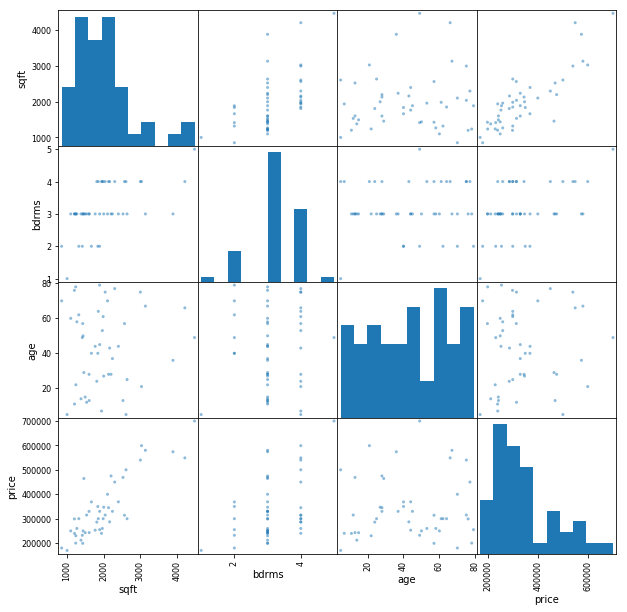

In [33]:
_ = pd.plotting.scatter_matrix(df, figsize = (10, 10))

In [34]:
x = df[['sqft','bdrms','age']].values
y = df[['price']].values

In [35]:
regr = LinearRegression()

In [36]:
regr = LinearRegression()
n_data = len(y)
ind = np.arange(n_data)
np.random.shuffle(ind)
split_point = n_data // 5
test_ind = ind[:split_point]
train_ind = ind[split_point:]
x_train = x[train_ind]
x_test  = x[test_ind]
y_train = y[train_ind]
y_test  = y[test_ind]


regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
print('Slope = {}'.format(regr.coef_))
print('Intercept = {}'.format(regr.intercept_))

Slope = [[   138.47051551 -12869.68171477   -209.94156767]]
Intercept = [111790.73818207]


In [38]:
def R2():
    A = np.mean((regr.predict(x_test)-y_test) ** 2)
    print('Mean Square Error = {}'.format(A))
R2()
print('Variance score: {}'.format(regr.score(x_test, y_test)))

R2 = 1689849048.7354348
Variance score: 0.899282710041944


## Exercise 2

- split your housing dataset into training and test sets using [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a test size of 30% and a random_state=42
- Train the previous model on the training set and check the R2 score on the test set
- Train a regularized regression model like [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) or [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) on the trainin dataset and test the score on the test set
- does regularization improve the score?
- Try changing the regularization strength alpha

*Copyright &copy; 2017 Francesco Mosconi & CATALIT LLC. All rights reserved.*